<center>
    
    
# Equilibrius: The Art of Actor-Critic Learning


    
</center>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from ActorCriticWithET import ActorCritic

Implement **ACTOR-CRITIC with Eligibility Traces** (p. 332).

In [9]:
# Environment setup
# env = gym.make("MountainCar-v0")
env = gym.make("Acrobot-v1")
# env = gym.make("CartPole-v1")
runs = 1
episodes = 100
alpha = 0.001
lamda = 0.7
gamma = 1
order = 2
epsilon = 0.001
max_ep = 500
# Create an instance of the ActorCritic class
lows = env.observation_space.low
highs = env.observation_space.high

lows[1] = -3.4
lows[3] = -4
highs[1] = 3.4
highs[3] = 4
ac_agent = ActorCritic(env=env, runs=runs, episodes=episodes, alpha=alpha, w_lambda=lamda, gamma=gamma, order=order, epsilon=epsilon, max_ep=max_ep, lows=lows, highs=highs)

In [ ]:
# Train the Actor-Critic with Eligibility Traces
w, theta, total_steps, total_rewards = ac_agent.train()

# Print average rewards and steps
print("Total Rewards per Episode:")
print(total_rewards)

print("\nTotal Steps per Episode:")
print(total_steps)

env.close()

Run number: 1


  2%|▊                                          | 2/100 [00:12<10:30,  6.44s/it]

Plot sum of reward-per-episode vs. number of episodes. This plot should be averaged over 50-100 runs.

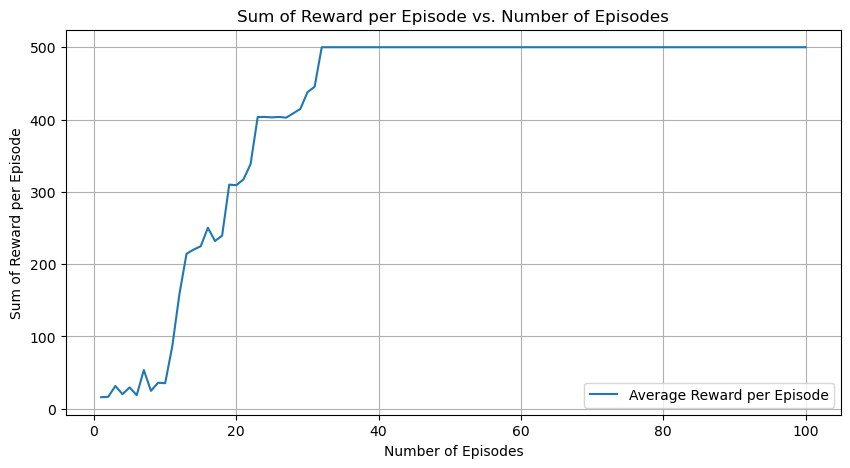

In [5]:
# Your code here
average_rewards = np.mean(total_rewards, axis=0)
episode_numbers = np.arange(1, len(average_rewards) + 1)

plt.figure(figsize=(10, 5))
plt.plot(episode_numbers, average_rewards, label='Average Reward per Episode')
plt.title('Sum of Reward per Episode vs. Number of Episodes')
plt.xlabel('Number of Episodes')
plt.ylabel('Sum of Reward per Episode')
plt.legend()
plt.grid(True)
plt.show()

Plot step-per-episode (in log scale) vs. number of episodes. This plot should be averaged over 50-100 runs.

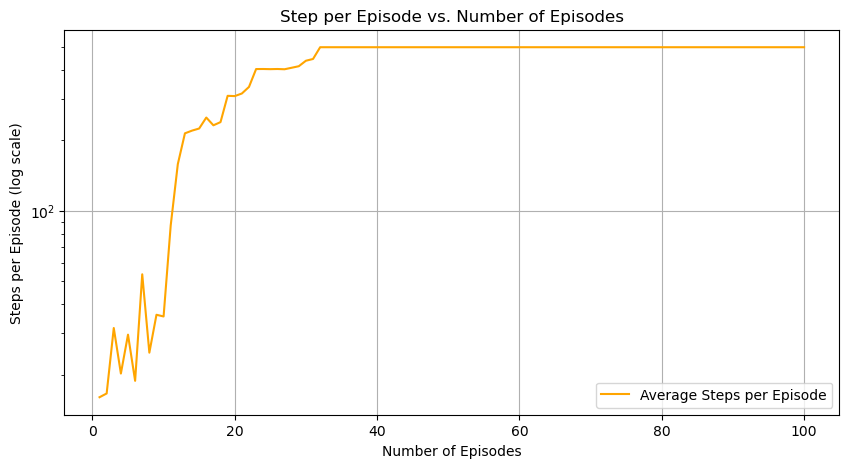

In [6]:
average_steps = np.mean(total_steps, axis=0)

plt.figure(figsize=(10, 5))
plt.plot(episode_numbers, average_steps, label='Average Steps per Episode', color='orange')
plt.title('Step per Episode vs. Number of Episodes')
plt.xlabel('Number of Episodes')
plt.ylabel('Steps per Episode (log scale)')
plt.yscale('log')  # Log scale
plt.legend()
plt.grid(True)
plt.show()


Animate the last episode in a selected run

In [7]:
env = gym.make("CartPole-v1", render_mode = "human")
state, _ = env.reset()
state = ac_agent.state_norm(state)
avg_w = np.mean(w, axis=0)

while True:
    X_s = ac_agent.fourier_basis(state)
    action = ac_agent.epsilon_greedy_policy(avg_w, X_s, 0)  # Choose the best action

    env.render()

    next_state, _, done, _, _ = env.step(action)
    next_state = ac_agent.state_norm(next_state)

    if done:
        break

    state = next_state
env.close()

KeyboardInterrupt: 

### Task Explanation: Running Cart Pole Environment on Actor-Critic Algorithm with Eligibility Trace

The task of running the Cart Pole environment using an Actor-Critic algorithm with eligibility trace involves training an agent to balance a pole on a moving cart. The goal is to prevent the pole from falling over while keeping the cart within the screen. The state space in this environment includes variables like the position and velocity of the cart, as well as the angle and rotation rate of the pole. The action space is binary, consisting of moving the cart either left or right. The reward system is typically designed to provide a positive reward for each time step the pole remains upright, encouraging the agent to learn strategies to maintain balance for as long as possible. The Actor-Critic algorithm with eligibility trace combines the advantages of both policy-based and value-based methods, updating the policy (actor) and value estimates (critic) with considerations of both immediate and future rewards. The use of eligibility traces allows for more efficient learning by attributing credit to not only the most recent state-action pair but also to those preceding it.

### Parameter Selection Process

In the Cart Pole environment using the Actor-Critic algorithm, selecting the right hyperparameters is crucial for efficient training. 

- `alpha (0.001)` is the learning rate, determining the step size in updating the policy and value functions. A low value ensures gradual learning without overshooting.
- `lamda (0.7)` represents the decay rate of the eligibility trace, balancing the importance between recent and past experiences.
- `gamma (1)` is the discount factor, set to 1 to emphasize long-term rewards, suitable for the continuous nature of the Cart Pole task.
- `order (2)` likely refers to the order of polynomial features for state representation, enhancing the capability to capture non-linear relationships.
- `epsilon (0.001)` is used for exploration, ensuring the agent occasionally takes random actions to discover new strategies.
- `max_ep (500)` caps the maximum length of an episode, which is a common practice to avoid excessively long trials without progress.

Adjusting the state space bounds (`lows` and `highs`) for velocity and angular velocity to [-3.4, 3.4] and [-4, 4] respectively, restricts the range of these variables, focusing the learning on a more manageable subset of the entire state space. This can help in faster convergence of the learning algorithm. The selection of these parameters involves a balance between efficient learning and sufficient exploration of the state-action space.
